<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/MODEL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
df = df.drop(['Time'], axis=1)

In [15]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
print(df.shape)

(284807, 30)


In [17]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [18]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [20]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Analyse Class Distribution

In [21]:
class_dist = df["Class"].value_counts(normalize=True)
print(f"Fraud: {class_dist[1]*100:.2f}%, Non-Fraud: {class_dist[0]*100:.2f}%")

Fraud: 0.17%, Non-Fraud: 99.83%


Text(0.5, 1.0, 'Class Distribution')

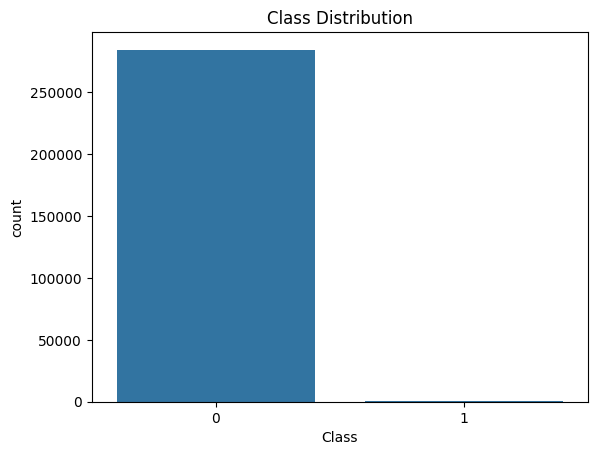

In [22]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")

(0.0, 26000.0)

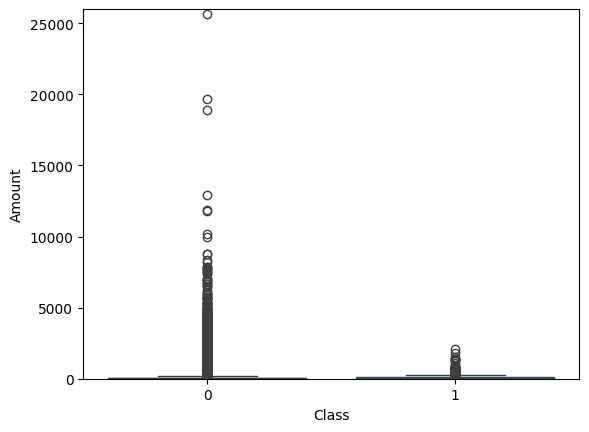

In [23]:
sns.boxplot(x="Class", y="Amount", data=df)
plt.ylim(0, 26000)  # Focus on typical transactions

In [24]:
# prompt: split the data into two one fraud and other not fraud

# Separate fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
not_fraud = df[df['Class'] == 0]

print(f"Shape of fraud transactions: {fraud.shape}")
print(f"Shape of non-fraud transactions: {not_fraud.shape}")


Shape of fraud transactions: (492, 30)
Shape of non-fraud transactions: (284315, 30)


In [25]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [26]:
not_fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


<Axes: >

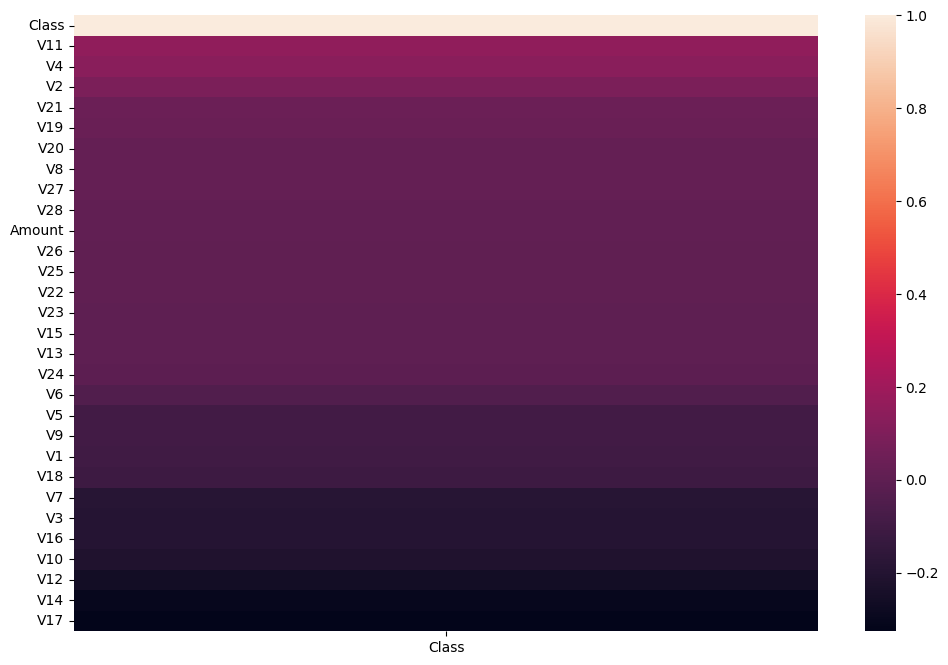

In [27]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[["Class"]].sort_values(by="Class", ascending=False), annot=False)

#Splitting the Dataset

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
X_train.shape

(227845, 29)

In [30]:
y_train.shape

(227845,)

In [31]:
X_test.shape

(56962, 29)

In [32]:
y_test.shape

(56962,)

#Scaling

In [33]:
import pandas as pd

# Check skewness for each numerical column
skewness = df.skew().sort_values(ascending=False)
print(skewness)


Class     23.997579
Amount    16.977724
V28       11.192091
V21        3.592991
V7         2.553907
V6         1.826581
V10        1.187141
V4         0.676292
V26        0.576693
V9         0.554680
V11        0.356506
V19        0.109192
V13        0.065233
V22       -0.213258
V18       -0.259880
V15       -0.308423
V25       -0.415793
V24       -0.552499
V16       -1.100966
V27       -1.170209
V14       -1.995176
V20       -2.037155
V3        -2.240155
V12       -2.278401
V5        -2.425901
V1        -3.280667
V17       -3.844914
V2        -4.624866
V23       -5.875140
V8        -8.521944
dtype: float64


In [34]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Define feature groups
robust_features = ["Amount", "V28", "V21", "V7", "V6", "V10", "V16", "V27", "V14", "V20", "V3", "V12", "V5", "V1", "V17", "V2", "V23", "V8"]
minmax_features = ["V4", "V26", "V9"]
standard_features = ["V11", "V19", "V13", "V22", "V18", "V15", "V25", "V24"]

# Initialize scalers
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Apply scaling (fit only on train, transform both train & test)
X_train[robust_features] = scaler_robust.fit_transform(X_train[robust_features])
X_test[robust_features] = scaler_robust.transform(X_test[robust_features])

X_train[minmax_features] = scaler_minmax.fit_transform(X_train[minmax_features])
X_test[minmax_features] = scaler_minmax.transform(X_test[minmax_features])

X_train[standard_features] = scaler_standard.fit_transform(X_train[standard_features])
X_test[standard_features] = scaler_standard.transform(X_test[standard_features])


In [36]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,2.278450e+05,227845.000000,2.278450e+05,2.278450e+05,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.008005,-0.046503,-0.093963,0.251929,0.042146,0.234100,-0.035892,-0.044155,0.462804,0.093869,...,0.178906,0.071512,9.667460e-19,0.035646,1.524964e-17,-1.615401e-17,0.425469,-0.009469,-0.084455,0.921034
std,0.876277,1.175709,0.789946,0.062764,1.058472,1.141594,1.101796,2.224311,0.037802,1.097087,...,2.238417,1.772640,1.000002e+00,2.027064,1.000002e+00,1.000002e+00,0.078724,2.500835,2.494793,3.489528
min,-25.240869,-51.888331,-25.286650,0.000000,-87.227315,-22.199008,-38.787566,-136.727546,0.000000,-24.739260,...,-158.079315,-83.936021,-1.506537e+01,-144.729347,-4.685700e+00,-1.975069e+01,0.000000,-139.372595,-117.828819,-0.306193
25%,-0.419853,-0.473043,-0.558655,0.214378,-0.489000,-0.424016,-0.528377,-0.431349,0.440722,-0.446735,...,-0.432828,-0.479890,-7.473244e-01,-0.487686,-5.857482e-01,-6.067362e-01,0.372117,-0.445917,-0.489530,-0.227697
50%,0.000000,0.000000,0.000000,0.250983,0.000000,0.000000,0.000000,0.000000,0.461035,0.000000,...,0.000000,0.000000,8.676018e-03,0.000000,6.782433e-02,3.210883e-02,0.417016,0.000000,0.000000,0.000000
75%,0.580147,0.526957,0.441345,0.284835,0.511000,0.575984,0.471623,0.568651,0.483389,0.553265,...,0.567172,0.520110,7.275110e-01,0.512314,7.256373e-01,6.725094e-01,0.464788,0.554083,0.510470,0.772303
max,1.088431,15.679744,4.797511,1.000000,26.743522,63.095391,107.248991,37.306994,1.000000,24.076249,...,114.659926,65.680556,1.447195e+01,72.820276,7.574215e+00,1.164832e+01,1.000000,195.224996,258.198704,357.260404


In [37]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,-0.009784,-0.044788,-0.092965,0.251934,0.041477,0.239121,-0.036233,-0.040105,0.462683,0.095836,...,0.193411,0.067053,-0.002085,0.034832,0.002290,0.006287,0.425366,-0.007293,-0.090320,0.933095
std,0.875769,1.183597,0.792458,0.062765,1.061077,1.146105,1.095844,2.250998,0.038022,1.110152,...,2.240128,1.767356,0.999775,1.978833,1.002694,1.000401,0.078959,2.460406,2.612565,3.447411
min,-16.809036,-30.112884,-17.012645,0.018623,-30.976081,-16.912895,-27.791313,-94.670723,0.136160,-22.314135,...,-81.158041,-54.817795,-12.245976,-86.392031,-4.662171,-14.379486,0.122380,-60.815837,-64.277574,-0.306193
25%,-0.420801,-0.472316,-0.555343,0.214024,-0.487217,-0.422670,-0.530958,-0.437518,0.440235,-0.445085,...,-0.434280,-0.482742,-0.749125,-0.486242,-0.583210,-0.609301,0.371680,-0.449673,-0.491158,-0.229645
50%,-0.001858,0.003069,-0.000081,0.251332,0.002040,-0.000285,-0.001237,-0.008937,0.460941,0.001811,...,0.001628,-0.001867,0.010586,-0.003053,0.069212,0.037378,0.416657,-0.003506,0.000759,0.000000
75%,0.580213,0.526231,0.442819,0.285058,0.514578,0.581119,0.471179,0.564480,0.483211,0.550447,...,0.571992,0.520374,0.728904,0.513127,0.731236,0.681922,0.464865,0.550271,0.516860,0.758942
max,1.089791,12.737301,2.109373,0.789746,22.110115,20.746001,39.158008,34.086612,0.777139,14.043788,...,76.375066,65.680556,11.398021,61.430188,6.646304,14.427753,0.934474,64.886694,172.522604,179.386639


#Training the model

In [38]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.5008661206149896, 1: 289.14340101522845}


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define model architecture
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model with weighted loss
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=32, class_weight=class_weight_dict)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9663 - loss: 1.3803 - val_accuracy: 0.9719 - val_loss: 0.1521
Epoch 2/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9516 - loss: 0.2884 - val_accuracy: 0.9904 - val_loss: 0.0712
Epoch 3/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9643 - loss: 0.2886 - val_accuracy: 0.9898 - val_loss: 0.0651
Epoch 4/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9790 - loss: 0.2267 - val_accuracy: 0.9855 - val_loss: 0.0639
Epoch 5/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9646 - loss: 0.2373 - val_accuracy: 0.9774 - val_loss: 0.0927
Epoch 6/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9526 - loss: 0.2498 - val_accuracy: 0.9810 - val_loss: 0.0596
Epoch 7/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9636 - loss: 0.1708 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 8/30
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9261 - loss: 0

In [41]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_class))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.90      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9128 - loss: 0.2182 - val_accuracy: 0.9940 - val_loss: 0.0186 - learning_rate: 5.0000e-04
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9819 - loss: 0.0542 - val_accuracy: 0.9969 - val_loss: 0.0110 - learning_rate: 5.0000e-04
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9982 - val_loss: 0.0077 - learning_rate: 5.0000e-04
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9983 - val_loss: 0.0069 - learning_rate: 5.0000e-04
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9986 - val_loss: 0.0061 - learning_rate: 5.0000e-04
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9984 - val_loss: 0.0065 - learning_rate: 5.0000e-04
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 

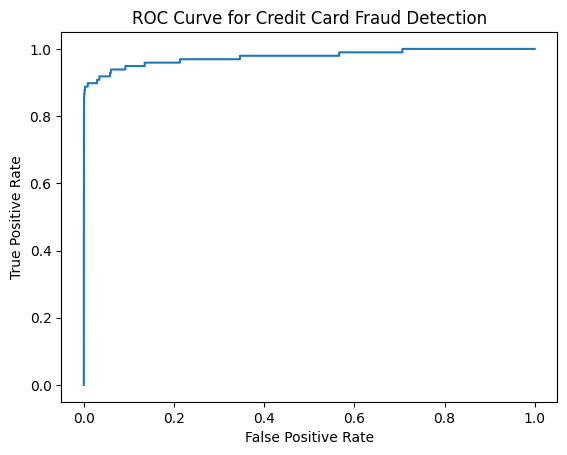

In [43]:
# prompt: improve precision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE


# ... (Your existing code for data loading, preprocessing, etc.)


# # Improved Model with SMOTE and Hyperparameter Tuning
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Define a more complex model architecture
model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    BatchNormalization(),  # Add batch normalization for stability
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile the model with a different optimizer and learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])


# Train the model with early stopping and reduced learning rate on plateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=64,
                    callbacks=[early_stopping, reduce_lr])


# Predict probabilities
y_pred_prob = model.predict(X_test)


# Evaluate the model
y_pred_class = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_class))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")
print(f"F1 Score: {f1_score(y_test, y_pred_class)}")

#Plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Credit Card Fraud Detection")
plt.show()


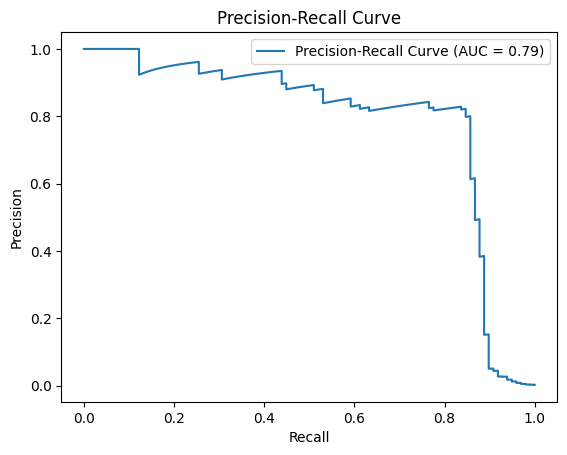

In [44]:
# prompt: precision recall curve with auc score for that

from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC score for precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


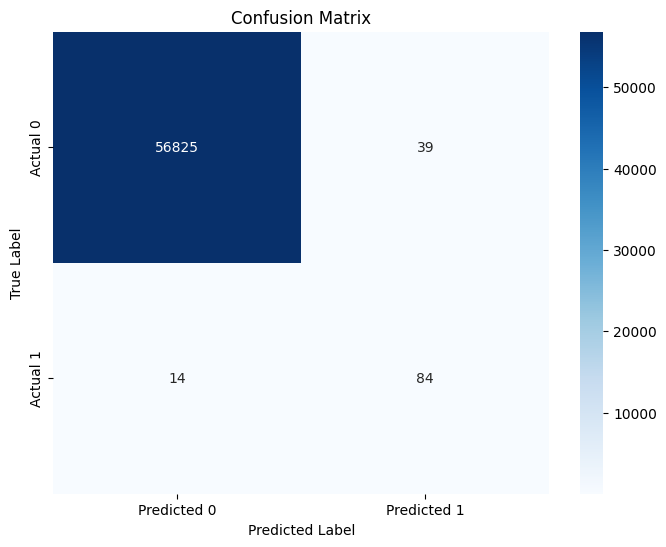

In [45]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_class are defined from your previous code
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9160 - loss: 0.2153 - val_accuracy: 0.9936 - val_loss: 0.0215
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9786 - loss: 0.0610 - val_accuracy: 0.9978 - val_loss: 0.0093
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9873 - loss: 0.0389 - val_accuracy: 0.9979 - val_loss: 0.0082
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9906 - loss: 0.0315 - val_accuracy: 0.9981 - val_loss: 0.0082
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9984 - val_loss: 0.0073
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9986 - val_loss: 0.0059
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9940 - loss: 0.0216 - val_accuracy: 0.9987 - val_loss: 0.0062
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9944 - loss: 0

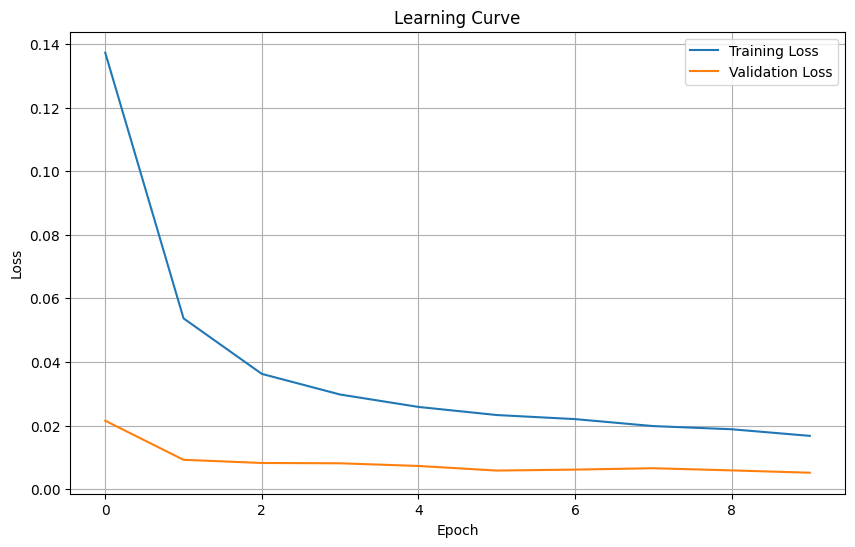

In [50]:
!pip install tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ... (Your existing code for data loading, preprocessing, and SMOTE) ...

# Define the Keras model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=64)

# Plot the learning curve (training and validation loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9768857740057193
F1 Score: 0.7601809954751131


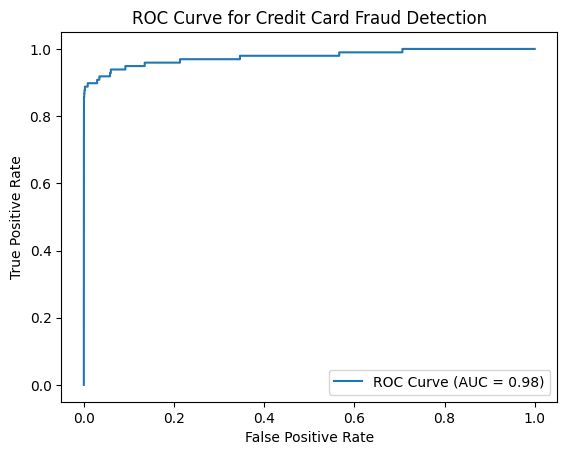

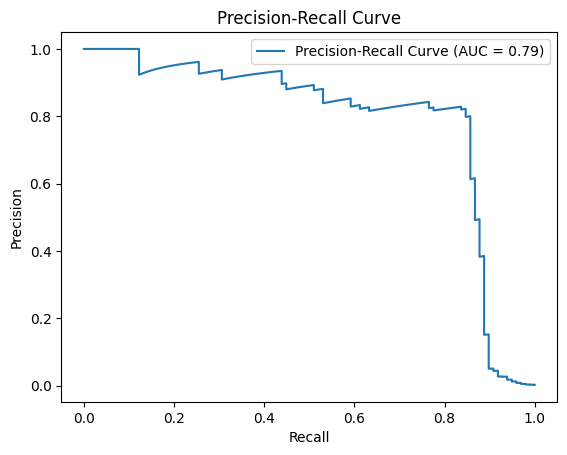

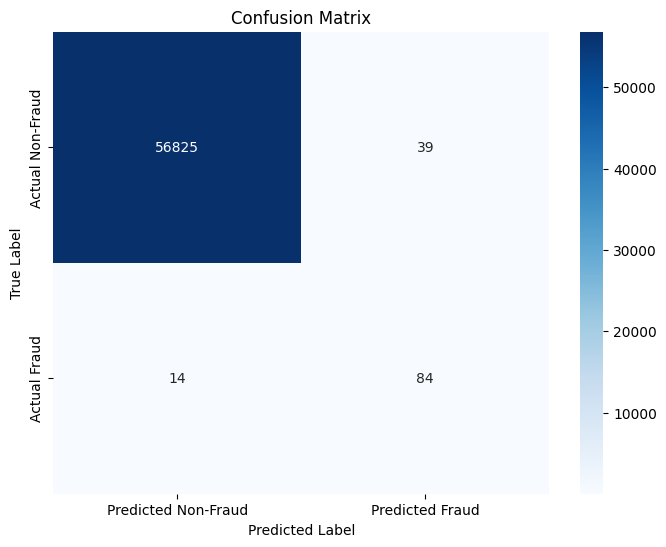

In [51]:
# prompt: Give the models metrics with precision recall auc curve and confusion matrix

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Your existing code) ...

# Assuming y_test and y_pred_prob are defined from your model's predictions
# y_pred_prob = model.predict(X_test)  # Probabilities for the positive class


# Evaluate the model (already present in your code)
y_pred_class = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_class))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")
print(f"F1 Score: {f1_score(y_test, y_pred_class)}")


# ROC Curve (already present, but adding explicit label)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)  # Calculate AUC here
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})") # Add AUC value to the label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Credit Card Fraud Detection")
plt.legend(loc="lower right") # Add a legend
plt.show()


# Precision-Recall Curve (already present)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Confusion Matrix (already present, but improved visualization)
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Non-Fraud", "Predicted Fraud"],
            yticklabels=["Actual Non-Fraud", "Actual Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [52]:
# prompt: PRInt accuracy precision recall f1 as a table

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_class are defined from your model's predictions
# y_pred_class = (y_pred_prob > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Value': [accuracy, precision, recall, f1]}
df_metrics = pd.DataFrame(data)
df_metrics


,Metric,Value
0,Accuracy,0.999070
1,Precision,0.682927
2,Recall,0.857143
3,F1-score,0.760181
